<a href="https://colab.research.google.com/github/nat-smithh/ag-sci/blob/main/highdim_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear modeling in high dimensions

So far, we have learned how to fit a 1-dimensional linear neural network to data using tensorflow. As is the case with most 'general' computational frameworks, there is a fair amount of code needed to just implement a linear model using a neural network. Perhaps this particular framework is a bit of 'over kill' for simple 1D linear modeling? However, by using a general framework to implement and fit our model, it makes extending our model to higher dimensions *much* easier.

In this notebook, you'll build, train and use multi-dimensional linear neural networks. This will expand the capability of our network to handle data of *any* dimension, while constraining the model to assume a linear relationship between the explanatory and response variables.

We'll start with 2-dimensional explanatory variables, which we can visualize in a 3D graph, with the response variable on the z-axis.

The following code cell uses scikit-learn's 'make_regression' function to simulate a 3D dataset, with 2D explanatory variables and a 1D response

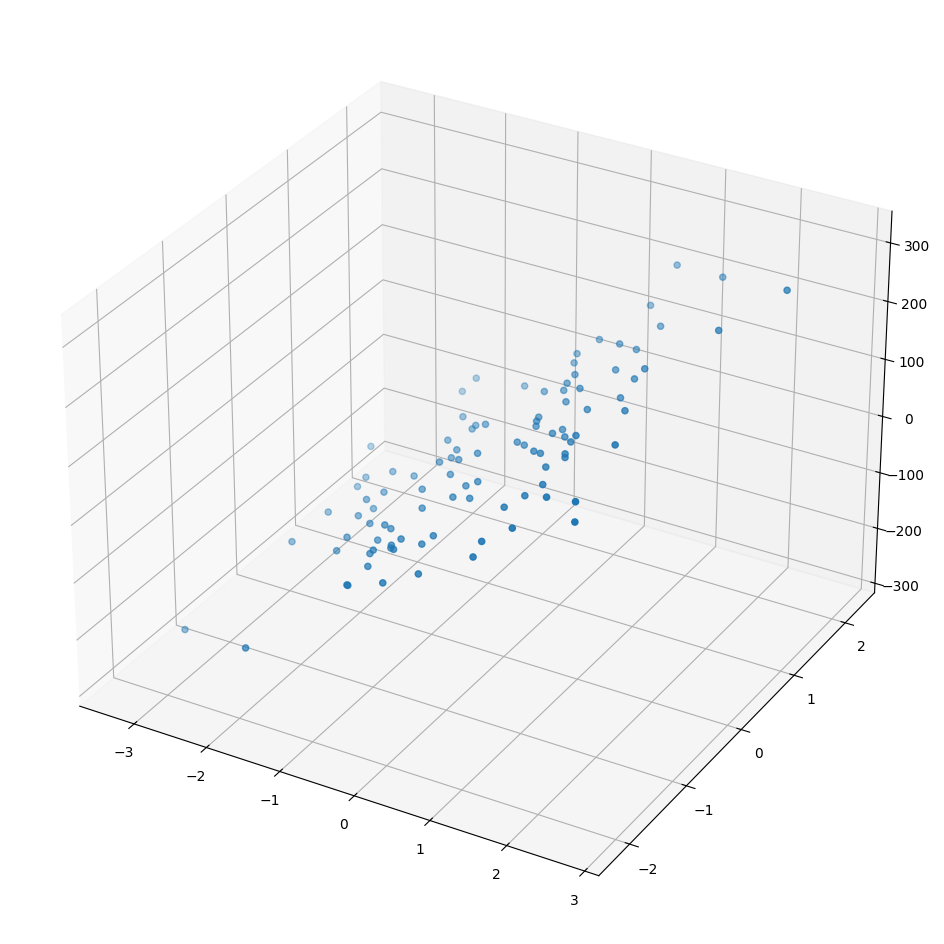

In [1]:
import sklearn.datasets
import matplotlib.pyplot as plt

x,y = sklearn.datasets.make_regression(n_samples=100,
                                       n_features=2,
                                       bias=50.0,
                                       noise=10.0,
                                       random_state=301918)

# let's plot the data in 3D for visualization
fig = plt.figure(figsize=(12,12))
axs = fig.add_subplot(projection='3d')
axs.scatter(x[:,0], x[:,1], y, marker='o')

Running the code block above, you should see a 3D graph with some blue dots lying roughly along a diagonal plane. It can be tough to 'see' the diagonal plane in the 2D projection of 3D data, but maybe if you squint hard enough...

You may have expected to see a *line* in 3D? I did, but then I looked it up!

Remember from Euclidean geometry how a "point" represents a fundamental zero-dimensional object modeling an exact location in space. The "line" extends the idea of a point to 1-dimension, and the "plane" represents the same concept in 2-dimensions. So, a "linear" model projected to 3 dimensions is seen as a "plane", which is what we see here.

In any case, you can see that the actual *simulation* of the data is *very* simple; the *only* thing we needed to change was

    n_features=1,

for 1-dimensional x values, to

    n_features=2,

for 2-dimensional x values.

Plotting the data in 3 dimensions was a bit more tricky; luckily this isn't a course on data visualization!

Because the "make_regression" function returns numpy arrays, we can see the 'shape' of the "x" and "y" values using the ".shape" attribute

In [ ]:
x.shape

As you can see, the "x" variable is a rank-2 tensor (aka, a "matrix") of values. The first rank is 100-dimensional, and the second rank is 2-dimensional, so the overall tensor is 100x2-dimensional.

In this case, the first dimension holds 100 replicate data samples (ie, independent samples from the *same* linear distribution). Each sample is 2-dimensional data.

You can 'see' the values stored in the "x" variable printed to the screen by executing the following code cell.

In [ ]:
print(x)

Looks like about 100 lines of output; each line having a vector with 2 values.

The shape of the "y" variable is a bit different

In [ ]:
y.shape

(100,)

The first rank is 100-dimensional, just like the first rank of the "x" variable, because the "y" variable is holding the corresponding response for *each* value of "x".

It's a little 'weird' that there is a comma after the dimension of the first rank, but nothing after the comma (except the closing parenthesis).

This is because the "y" variable is a rank-1 tensor (ie, a "vector" of values). Python indicates the shape of a vector by using "(" and ")" to indicate a "tuple", but leaving a trailing "," with nothing after it. There's no real deep reason for this; it's just the way python reports the shape of a rank-1 tensor.

You can confirm that "y" is a rank-1 tensor by printing it to the screen:

In [ ]:
print(y)

## building a 2D linear model in tensorflow

Simulating 2D linear data was pretty easy. Now let's try building a linear neural network that we can fit to these data.

Recall the code we used to build a 1D linear neural network in tensorflow (reproduced below).

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model.summary()

Looks like a reasonable linear model in 1D.

Recall that the 1D linear model

    y = mx + b

has 2 free model parameters, "m" (the slope) and "b" (the y-intercept or "bias"). The model's summary reflects this.

We can also see that the output shape of our model "(None, 1)" indicates that the model will output a 1-dimensional response. Recall that the "None" dimension is used by tensorflow to handle batch training.

So, how do we change this 1D linear model into a 2D linear model?

We *only* need to change one thing, and that is the "input_shape" of the model's first (and only) layer!

Our current 1D model has

    input_shape=[1]

indicating that it will accept rank-1 tensors with the first rank having dimension=1 (no need to specify the None dimension; tensorflow will take care of that for us).

We just need to change the "input_shape" to

    input_shape=[2]

And now we have a 2D linear model. Here is the complete executable code cell.

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[2]))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model.summary()

A 2D linear model has the equation

    y = m1*x1 + m2*x2 + b

There are 3 free parameters in this linear model, slopes "m1" and "m2", and bias "b". The model summary confirms that there are 3 "trainable" parameters in the model. The output shape is still "(None,1)", because our response variable "y" is still rank-1 and 1-dimensional (although the 'batch' dimension "None" will make the actual tensor rank-2 during training). The model summary tells us all of this information fairly concisely!

Let's fit our new 2D linear model to our training data.

First, we need to package our simulated data into a tensorflow Dataset object. We'll use a batch size of 10 for batch training.

In [ ]:
data = tf.data.Dataset.from_tensor_slices((x,y)).batch(10)

Remember that, if you get a 'name error', you may need to go back and re-run all the code cells in this notebook, to recreate the notebook's state.

Here, we are using the same "from_tensor_slices" function call as before, to package our (x,y) training data into a Dataset object. The code is exactly the same as we used for the 1D linear model, before. The "from_tensor_slices" function call is *exactly* the same, whatever the dimensions of our data might be. So, once we know how to package 1D training data into a Dataset object, we *also* automatically know how to package 2D or *any*-D data, for free! This is the awesome power of general computational libraries!

Because we know we'll want to use batched training, we went ahead and tacked the ".batch(10)" method call onto our Dataset object when we created it. You could also separate Dataset creation from batching:

    data = tf.data.Dataset.from_tensor_slices((x,y))
    data = data.batch(10)

Which is *equivalent* to the code cell above; the choice is one of *style*, not substance.

The training data are ready. Let's fit our model.

Because we have *already* compiled the model with an optimizer and loss function, we just need to call the "fit" method on the model object.

We'll train for 100 epochs, which should be plenty.

In [ ]:
model.fit(data, epochs=100)

In my case, the model reached a mean squared error loss of < 89.3 by epoch 32 and found what *appears* to be a minimum of 89.2379 by epoch 57, at least to the 4 decimal digits of precision reported.

Of course, we don't *know* for sure that the model has reached a global minimum. The stochastic gradient descent algorithm is... "stochastic"; it is not *guaranteed* to reach a minimum, either *globally* or even *locally*. But it's probably pretty close in this case!

Fitted model in hand, let's use it to predict "y_hat" values, given the "x" values from our simulated training data.

Then we'll plot "y" vs "y_hat", to see how 'good' our model looks.

In [ ]:
y_hat = model.predict(x)

fig = plt.figure(figsize=(12,12))
axs = fig.add_subplot(projection='3d')
axs.scatter(x[:,0], x[:,1], y, marker='o')
axs.scatter(x[:,0], x[:,1], y_hat, marker='+')

The orange "+" symbols are the predicted "y_hat" values from our fitted model, plotted along with the 'true' "y" values (blue circles).

They seem pretty similar! The predicted y_hat values are *constrained* by our model to lie *exactly* on a 'linear' plane (ie, line in 2D). The 'true' y values were simulated with *error*; we can observe this by seeing that the blue dots tend to lie 'a little lower' or 'a little higher' than the corresponding 'best-fit' linear model predictions (orange +).

If the model is a "good fit" to our data, we should see:

* The blue dots are 'pretty close' to the orange +; that is, the "residuals" (difference between true and predicted values) are not that big (in absolute value).
* There are roughly an 'equal number' of blue dots that are *below* the corresponding orange + (residual is *negative*) and blue dots that are *above* the corresponding orange + (residual is *positive*); that is, the residuals are not "skewed" in one direction (all positive, or all negative).
* The difference between each blue dot's z-value and that of its corresponding orange + is roughly the same across the *entire* range of x values. We *don't* see a big cluster of residuals that are all really big, or all really small, and there doesn't seem to be any strong *trend* in the residuals, with them getting bigger or smaller in one direction. In general, we'd like to 'see' the residuals being fairly *randomly* distributed across the entire range of x values.

It can be a bit difficult to reliably evaluate model fit by looking at a 3D plot, but it can help us to spot any *major* problems.

## fitting a linear model in "k"-dimensions

By now we've seen linear models in 1 dimension, and how they can be easily changed into 2-dimensional models.

I hope you saw the 'pattern', because now *you* need to build a linear model in **8 dimensions**!

The 'skeleton' code is in the following code cell. This is an 'end-to-end' example that simulates data, builds and fits a model, and then predicts the response values from the original training data's x-values. We can't plot in 9 dimensions, so we've omitted the plotting part.

The *only* parts of the code you'll need to change are the parts that read "FIXME".

You'll probably want to change the "FIXME" parts in the code cell below to simulate data and fit a linear model in **8 dimensions**. Run it to make sure it works, and you might need the output for the quiz.

In [ ]:
import sklearn.datasets
import tensorflow as tf

# simulate 8-dimensional data
x,y = sklearn.datasets.make_regression(n_samples=100,
                                       n_features=FIXME,
                                       bias=-10.0,
                                       noise=10.0,
                                       random_state=221886)
y = y * 0.5

# build a linear model in 8-dimensions
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[FIXME]))
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.MeanSquaredError())
model.summary()

# package training data
data = tf.data.Dataset.from_tensor_slices((x,y)).batch(10)

# fit linear model
model.fit(data, epochs=100)

# predict y_hat values
y_hat = model.predict(x)

While we can't plot the model fit, we can print the "residuals" to the screen.

In [ ]:
print(y-y_hat.ravel())

We see a vector of 100 values; each value is the 'true' simulated y-value *minus* its corresponding predicted y_hat-value. If the model fit is "good", there should be a roughly equal number of positive and negative residuals, and the positive and negative residuals should have roughly the same distribution of absolute values (ie, neither positive nor negative residuals are systematically 'bigger' than the other).

It's tough to evaluate residuals by looking at the printed numbers, but you might just spot something *obviously* wrong, if your model fit is *way* off. In this case, it looks fine 'by eye'.

Incidentally, you may have noticed that we called the "ravel" method on the predicted y_hat values, before subtracting them from the corresponding y values. This is because tensorflow produces its predicted values in a rank-2 tensor of shape

    (100,1)

You can see this by executing the next code cell

In [ ]:
print(y_hat.shape)

In many cases, this doesn't matter, but in this case it does. The

    y_hat.ravel()
    
method call "flattens" the tensor to rank-1, so it can be effectively subtracted (point-wise) from the true y values (also a rank-1 tensor).

Of course, this isn't important for neural network model fitting, but in case you are interested, that's what's going on.

For those of you with little or no experience in python, there are likely to be a *lot* of things going on in the code cells that do *not* make *any* sense!

This is *absolutely fine*, and you shouldn't feel like you *need* to understand all the code to do well in this course or meet the learning objectives.

*All* the code having to do with plotting or printing data to the screen (except the model.summary() call) has *absolutely nothing to do with neural networks or AI*; you don't need to know how this code works to build, train, use or evaluate neural networks.

The plotting and printing code is not *really* part of this course; it is there to help *you* learn about what the AI-related code is doing when it executes. Some students will benefit from 'seeing' the process this way; it might 'spark' some new level of 'understanding' in some way. For other students, plotting data or printing it to the screen might not be very helpful, and it might even *confuse* some students!

If the plotting and printing examples are helping you learn, please use them. If you are interested in how they are done, the code is embedded directly in the jupyter notebook, so you can play around with it and see how it works, if you like (you can always grab a fresh copy of *any* notebook from the course link!). If you don't like the plotting and printing examples, feel free to ignore them!

The *main* concepts to *focus on* in the code cells are:

1. Understanding how the various code 'snippets' correspond to the 'conceptual' components of neural network models, including
    * model architecture
        * model depth (number of layers)
        * layer width (neurons / layer)
    * training data
        * data shape
        * batch size
    * model fitting
        * loss function
        * optimizer
        * epochs
2. Understanding *what* you need to *change* in the code, in order to change a *specific* aspect of the model. In this notebook, we focused on how to change the *dimension* of our linear model. The *vast majority* of the AI code was unchanged! Later on, you'll learn how to make other types of changes to your model, by making small but specific changes to the basic AI code. This will give you the basic 'tools' you can use to build highly-complex models *systematically* and with *intention*, allowing you to tailor your model to fit *your* data, based on your understanding of the data relevant to *your specific* field and particular analysis problem.
